# ***Non-Linear Regression***

# ***Table of content***

>[Non-Linear Regression](#scrollTo=GIq9zbU-Zzxj)

>>[Objective:](#scrollTo=5wE6QSjSuuzZ)

>>[Information](#scrollTo=YaDxF849vEIp)

>>>[Algorithm:](#scrollTo=T7zmJbqnwZV6)

>>[Analysis](#scrollTo=-fxa7rbTwrS8)

>>[Conclusion](#scrollTo=sSMxQKnZxK9o)



## ***Objective:***

1. Define a Non-linear Regression model with an example

2.Define a multiplicative model\
2.1 with an application\
2.2 with the assumptions on response, predictors, and residues

3.1 Fetch data from the application domain you have mentioned in 2.1\
3.2 Fit a simple multiplicative regression model with only a single response and predictor\
3.3 Do the residual analysis using adequate tests and plots\
3.4 Validate the assumptions using adequate tests and plots

4. Further outputs
4.1 Regression co-efficient tables
4.2 Accuracy and predictions

## ***Information***

1. A non-linear regression model is a statistical model that allows for a non-linear relationship between the dependent variable (response) and the independent variable(s) (predictors). Unlike linear regression, where the relationship is assumed to be linear, non-linear regression models can capture more complex patterns and curves in the data. An example of a non-linear regression model is the exponential growth model:

$Y = \beta_0 exp(\beta_1X + E)$

Here, Y is the dependent variable, X is the independent variable, $\beta_0$ and $\beta_1$ are the parameters to be estimated, e is the base of the natural logarithm, and E represents the error term.

2. A multiplicative model is a type of regression model where the relationship between the variables is expressed multiplicatively rather than additively. In a multiplicative model, changes in one variable affect the other variable proportionally.

2.1. An application of a multiplicative model could be modeling the relationship between sales revenue and advertising expenditure. The multiplicative model could be written as:

$Sales = \beta_0  (AdExpenditure) ^{\beta_1}  Seasonality + E$

Here, "AdExpenditure" represents advertising expenditure, "Seasonality" accounts for any seasonal effects, $\beta_0$ and $\beta_1$ are parameters to be estimated, and E is the error term.

2.2. Assumptions in a multiplicative model:
   - Response Variable: The response variable (e.g., sales) should have a multiplicative relationship with the predictors.
   - Predictor Variables: The predictor variables (e.g., advertising expenditure) should have a multiplicative impact on the response.
   - Residuals: The residuals should be normally distributed and homoscedastic (constant variance).

3.1. Let's consider an example where we have sales data for a retail store over several months, along with advertising expenditure and seasonal factors.

3.2. To fit a simple multiplicative regression model, you can use statistical software like Python's `statsmodels` or R. For instance, in Python with `statsmodels`, you could write something like:

```python
import statsmodels.api as sm

# Assuming you have data in a DataFrame called df with columns: Sales, AdExpenditure, Seasonality
X = df[['AdExpenditure']]
X = sm.add_constant(X)  # Add a constant for the intercept term
y = df['Sales']

model = sm.OLS(np.log(y), X)  # Using logarithmic transformation for the multiplicative model
results = model.fit()
print(results.summary())
```

3.3. For residual analysis and assumption validation, you can use various tests and plots:
   - Residual Analysis: Plotting residuals vs. predicted values, normality plots (Q-Q plots), and residuals vs. predictors.
   - Assumption Validation: Perform tests for normality of residuals (e.g., Shapiro-Wilk test), homoscedasticity (e.g., Breusch-Pagan test), and check for multicollinearity among predictors if applicable.

4. Further outputs:
   4.1. Regression Coefficient Tables: The regression results summary (`results.summary()` in Python) provides coefficient estimates, standard errors, t-values, and p-values for each predictor.
   4.2. Accuracy and Predictions: You can assess the accuracy of the model using metrics like R-squared, adjusted R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE). Make predictions using the model on new data to evaluate its predictive performance.

### ***Algorithm:***

Step 1 : Generate Synethic data

Step 2 : split the data into training and testing the data and fit multiplicative regression model

Step 3 : Plot the residual analysis check for the presence of heteroscedacity and other assumptions

Step 4 : Get regression coefficient tables

Step 5 : Get Predictions and Accuracy and find out accuracy using R squared etc.

## ***Analysis***

In [ ]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of observations
n = 100

# Generate synthetic data for advertising spending and market size
advertising_spending = np.random.uniform(100, 600, n)
market_size = np.random.uniform(50, 150, n)

# Generate revenue using a multiplicative relationship
revenue = 10 * advertising_spending * market_size + np.random.normal(0, 5000, n)

# Create DataFrame
data = pd.DataFrame({
    'Advertising Spending ($000)': advertising_spending,
    'Market Size (000 units)': market_size,
    'Revenue ($)': revenue
})

# Print first few rows of the dataset
print(data.head())

# Save the dataset to a CSV file
data.to_csv('multiplicative_regression_dataset.csv', index=False)


   Advertising Spending ($000)  Market Size (000 units)    Revenue ($)
0                   287.270059                53.142919  149263.570144
1                   575.357153               113.641041  655003.127583
2                   465.996971                81.435598  380952.782787
3                   399.329242               100.857069  399180.012615
4                   178.009320               140.756647  259888.823745


We do simulation to generate the data.

We have few rows from the generated data displayed above.

We have 'advertising spending' in thousand dollars, 'market size' in thousand units and 'revenue' in dollars.

In [ ]:
import statsmodels.api as sm

# Define predictors and response variables
X = data[['Advertising Spending ($000)', 'Market Size (000 units)']]
y = data['Revenue ($)']

# Add constant term to predictors
X = sm.add_constant(X)

# Fit the multiplicative regression model
model = sm.OLS(y, X)
results = model.fit()

# Print regression coefficients
print("Regression Coefficients:")
print(results.params)


Regression Coefficients:
const                         -330128.658638
Advertising Spending ($000)       992.113655
Market Size (000 units)          3318.354699
dtype: float64


We have the estimated regression co-efficients as

1. $\beta_0$ = -330128.658638
2. $\beta_1$ =  992.113655
3. $\beta_2$ = 3318.354699

The model is

$Revenue = \beta_0 * (advertising spending) ^{\beta_1} * (market size)^{\beta_2} + E$

The estimated model will be

$Revenue = -330128.658638 * (advertising spending) ^ {992.113655} * (market size) ^ {3318.354699} + E$


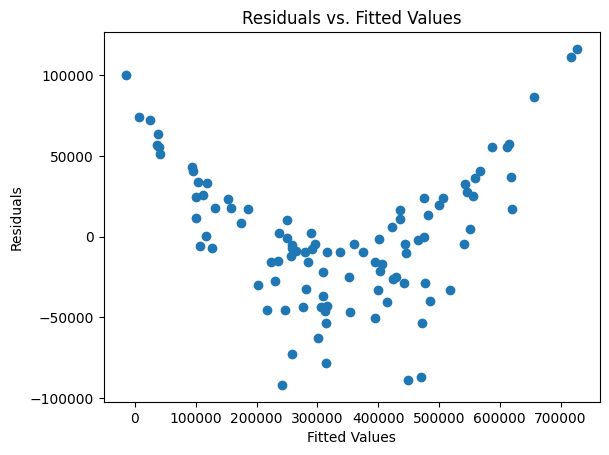

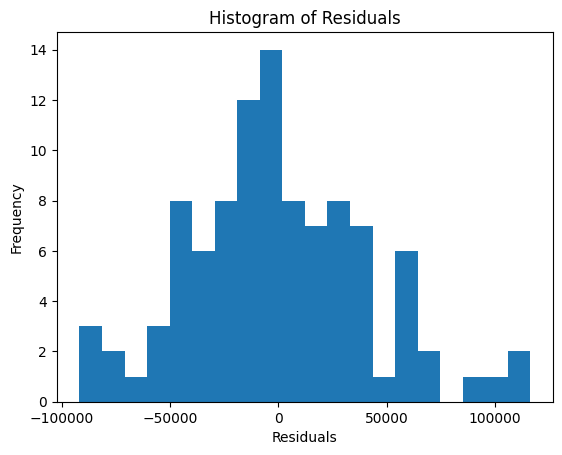

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = results.resid

# Plot residuals vs. fitted values
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# Plot histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


The above are the residual plots which fitted and the observed values of the residuals.
Here it shows the u-shape curve which shows the constant varince of the residuals.

Histogram shows the normality of the residuals.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test for heteroscedasticity
_, p_value, _, _ = het_breuschpagan(residuals, X)
print("Breusch-Pagan test p-value:", p_value)


Breusch-Pagan test p-value: 0.4505651152508955


Here we see that the p-value is 0.45 which is greater than the significance level say 0.05. SO we fail to reject H0 and say that the error follow constant variance.

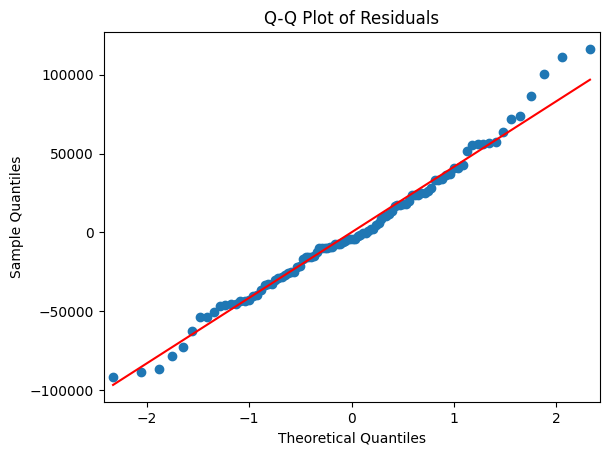

In [ ]:
import scipy.stats as stats

# Normality of Residuals
# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()


The above plot is the Q-Q plot which depicts that almost all the residuals follow the quantile line.

Hence we say that the residuals follow normal distribution.

In [ ]:
# Shapiro-Wilk test for normality
_, p_value_sw = stats.shapiro(residuals)
print("Shapiro-Wilk test p-value:", p_value_sw)


Shapiro-Wilk test p-value: 0.3067385943987999


We can also see from the p-value that is 0.3067. Hence we say that the residuals follow normal distribution.

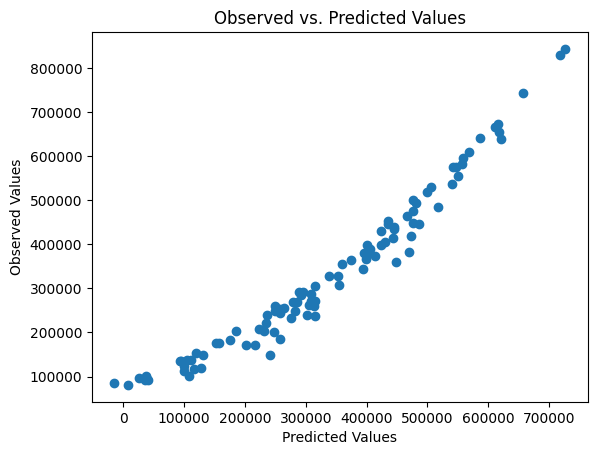

In [ ]:
# Linearity
# Plot observed vs. predicted values
plt.scatter(results.fittedvalues, y)
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.title("Observed vs. Predicted Values")
plt.show()


In [ ]:
# Print regression coefficient table
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            Revenue ($)   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     840.4
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           5.48e-62
Time:                        02:44:00   Log-Likelihood:                -1205.4
No. Observations:                 100   AIC:                             2417.
Df Residuals:                      97   BIC:                             2425.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Generate predictions
predictions = results.predict(X)

# Assess accuracy (R-squared)
rsquared = results.rsquared
print("R-squared:", rsquared)


R-squared: 0.9454393744349018


The R-squared value is 94.54%, which says that 94.54% of the variation is explined by the independent variables for the revenue.

## ***Conclusion***

Hence we see that the fitted non-linear model for the dataset, satisfies all the assumptions.

Also the R-squared value has a better variation explained.

Hence the non-linear model is better fot for the considered data.